# Disciplina de Machine Learning Modelos Supervisionados Modernos
# Marcelo Santos da Silva
## Trabalho 1 - Árvore de Decisão

## Mobile Price Classification
https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification







### Para criar o modelo, vamos seguir as etapas:
#### 1. Preparação dos dados
#### 2. Análise dos dados
#### 3. Pré-Processamento dos dados
#### 4. Desenvolvimento do modelo de machine learning
#### 5. Análise final

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
%notebook matplotlib
from warnings import filterwarnings
filterwarnings('ignore')

## Etapa 1 - Preparação os dados

O arquivo disponibilizado como "teste" (test.csv) será utilizado apenas para fazer a previsão final dos dados.

O teste em si será gerado a partir do arquivo de "treino" (train.csv).

In [3]:
#Criando datasets para os arquivos de treino e de teste
train=pd.read_csv('../data/train.csv')
test=pd.read_csv('../data/test.csv')

In [4]:
# Visualizando os dados de treino
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


### Descrição das Features / Atributos:

* __battery_power__: Energia total que uma bateria pode armazenar em um tempo medido em mAh
* __blue__ : Possui ou não bluetooth
* __clock_speed__ : Velocidade na qual o microprocessador executa instruções
* __dual_sim__ : Possui ou não suporte para dual sim support or not
* __fc__ : Mega pixels da câmera frontal
* __four_g__ : Possui ou não 4G
* __int_memory__ : Memória internal em gigabytes
* __m_dep__ : Espessura do celular em cm
* __mobile_wt__ : Peso do celular
* __n_cores__ : Número de núcelos do processador
* __pc__ : Mega pixels da câmera principal
* __px_height__ : Altura da resolução de pixels
* __px_width__ : Largura da resolução de pixels
* __ram__ : memória RAM em mega bytes
* __sc_h__: Altura da tela do celular em cm
* __sc_w__ : Largura da tela do celular em cm
* __talk_time__ : Tempo mais longo que uma única troca de bateria durará quando você estiver conversando
* __three_g__ : Possui ou não 3G
* __touch_screen__ : Possui ou não touch screen
* __wifi__ : Possui ou não wifi
* __price_range__ : Variável target: 0 (custo baixo), 1 (custo médio), 2 (alto custo), 3 (custo muito alto)

### 1.1 - Informações dos Dados

In [5]:
# Verificando tamanho dos datasets (linhas e colunas)
print('trian_shape:',train.shape)
print('test_shape',test.shape)

trian_shape: (2000, 21)
test_shape (1000, 21)


In [6]:
#Analisando informações básicas do dataset de treino
train.info

<bound method DataFrame.info of       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_wid

In [7]:
#Analisando informações básicas do dataset de teste
test.info

<bound method DataFrame.info of        id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0       1           1043     1          1.8         1  14       0           5   
1       2            841     1          0.5         1   4       1          61   
2       3           1807     1          2.8         0   1       0          27   
3       4           1546     0          0.5         1  18       1          25   
4       5           1434     0          1.4         0  11       1          49   
..    ...            ...   ...          ...       ...  ..     ...         ...   
995   996           1700     1          1.9         0   0       1          54   
996   997            609     0          1.8         1   0       0          13   
997   998           1185     0          1.4         0   1       1           8   
998   999           1533     1          0.5         1   0       0          50   
999  1000           1270     1          0.5         0   4       1          35

In [8]:
# Describe do treino
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
# Describe do teste
test.describe(include='all')

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


## Etapa 2 - Análise dos dados

### 2.1 - Análise da variável target (price_range)

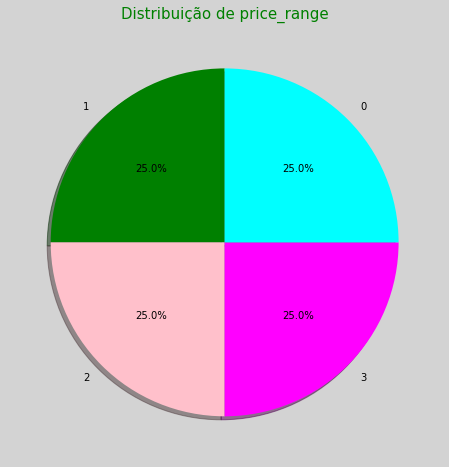

In [10]:
# Análise do balancemanto da variável target
labels = train["price_range"].value_counts().index
sizes = train["price_range"].value_counts()
colors = ['green','pink','magenta','cyan']
fig = plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors, shadow=True, startangle=90)
plt.title('Distribuição de price_range', color = 'green', fontsize = 15)
fig.set_facecolor('lightgrey')
plt.show()


Nesse gráfico, podemos verificar que o target está *balanceado*. Ou seja, existe uma distribuição simétrica de todos os possíves valores no conjunto de dados. 
<br>Portanto, podemos usar a *Acurácia (Accuracy)* como métrica para avaliação.


### 2.2 - Análise Exploratória para as features categóricas


In [11]:
# Listagem das variáveis categóricas
cat_columns=['blue','dual_sim','four_g','n_cores', 'three_g','touch_screen','wifi']

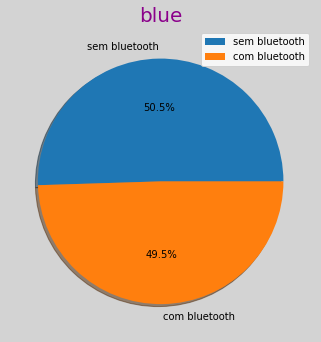

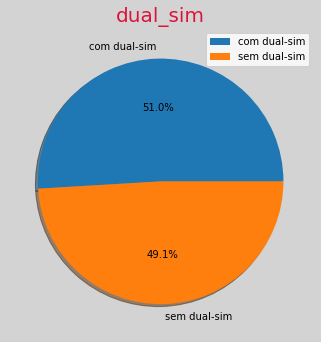

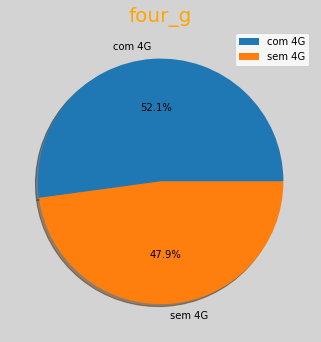

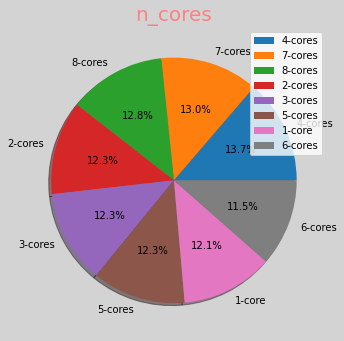

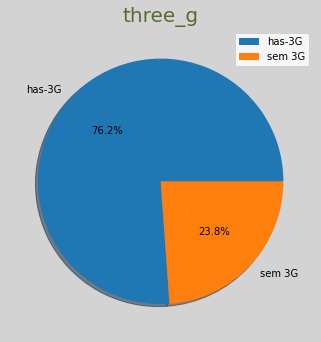

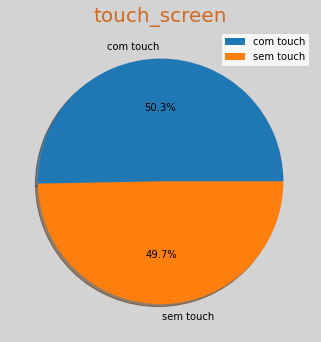

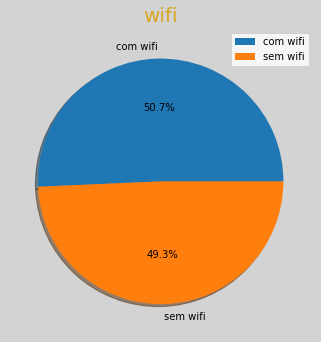

In [12]:

colors_cat=['#8B008B','#DC143C','#FFA500','#ff8080','#556B2F','#D2691E','#DAA520']
new_train=train.replace(to_replace={'blue':[0,1],'dual_sim':[0,1],'four_g':[0,1],
                      'n_cores':[1,2,3,4,5,6,7,8],'three_g':[0,1],'touch_screen':[0,1],'wifi':[0,1]},
           value={'blue':['sem bluetooth','com bluetooth'],
                  'dual_sim':['sem dual-sim','com dual-sim'],
                 'four_g':['sem 4G','com 4G'],
                 'n_cores':['1-core','2-cores','3-cores','4-cores','5-cores','6-cores','7-cores','8-cores'],
                 'three_g':['sem 3G','has-3G'],
                 'touch_screen':['sem touch','com touch'],
                 'wifi':['sem wifi','com wifi']})
for i,c in enumerate(cat_columns):
    fig = plt.figure(figsize =(5.5, 6.5))
    plt.pie(new_train[c].value_counts() ,labels=list(new_train[c].value_counts().index),shadow = True,autopct='%1.1f%%')
    plt.legend()
    plt.title(c,color=colors_cat[i],fontsize=20)
    fig.set_facecolor('lightgrey')

#### Analisando a presença das features em ambos os datasets:
* Observamos que, de forma geral, parece haver um distribuição semelhante dos valores entre as features, com a clara exceção do atributo 3G (onde o número de telefones que usam 3G é muito maior do que o número de telefones que não o usam).


### 2.3 - Análise Exploratória para as features numéricas

In [13]:
num_columns=['battery_power','clock_speed', 'fc', 'int_memory','m_dep','mobile_wt','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']

#### Neste passo, vamos fazer uma análise bivariada, relacionando cada variável numérica ao target (price_range).
#### Para isso, vamos utilizar o gráfico "jointplot" do seaborn, que apresenta não só o gráfico bivariado como também o gráfico univariado.
#### No gráfico bivariado, vamos utilizar a função "kde" (kernel density estimate), que nos permite uma análise mais acurada da relação entre as duas variáveis.

### 2.3.1 - Análise Bivariada

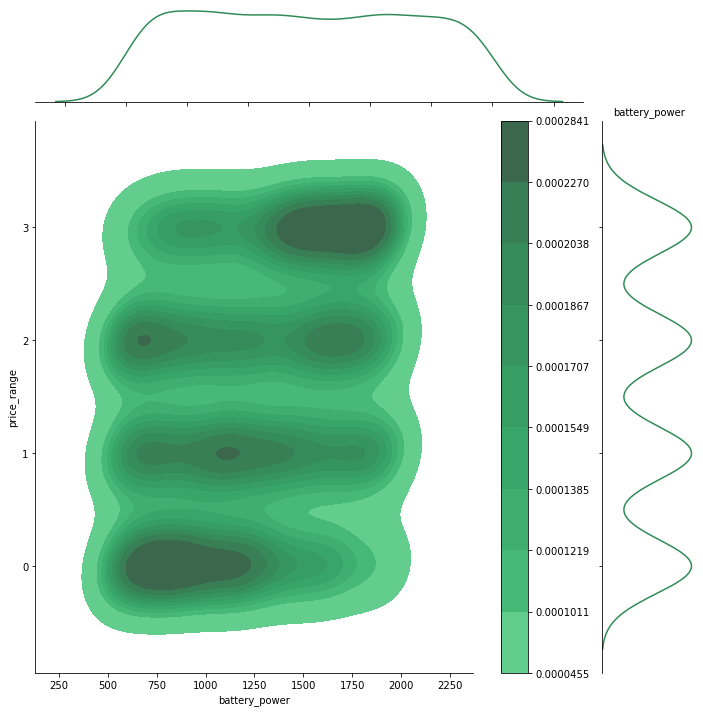

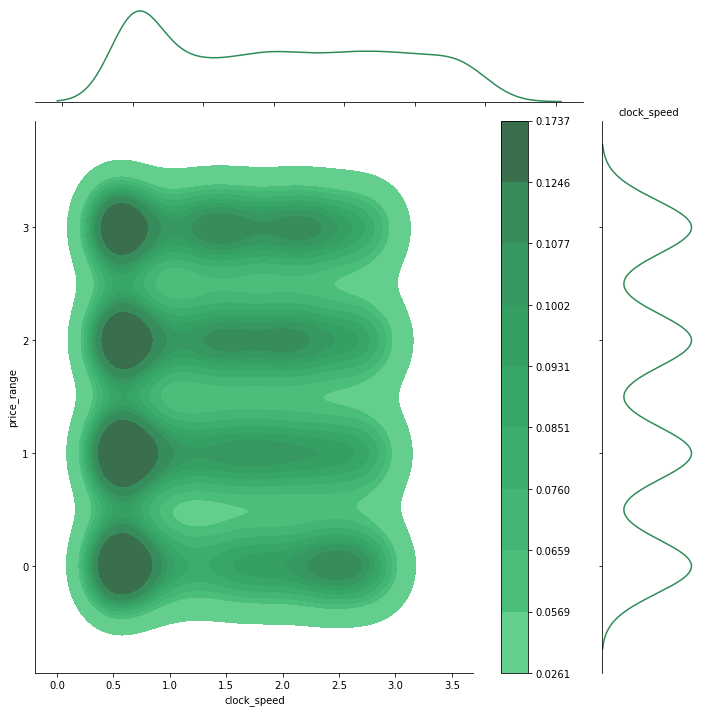

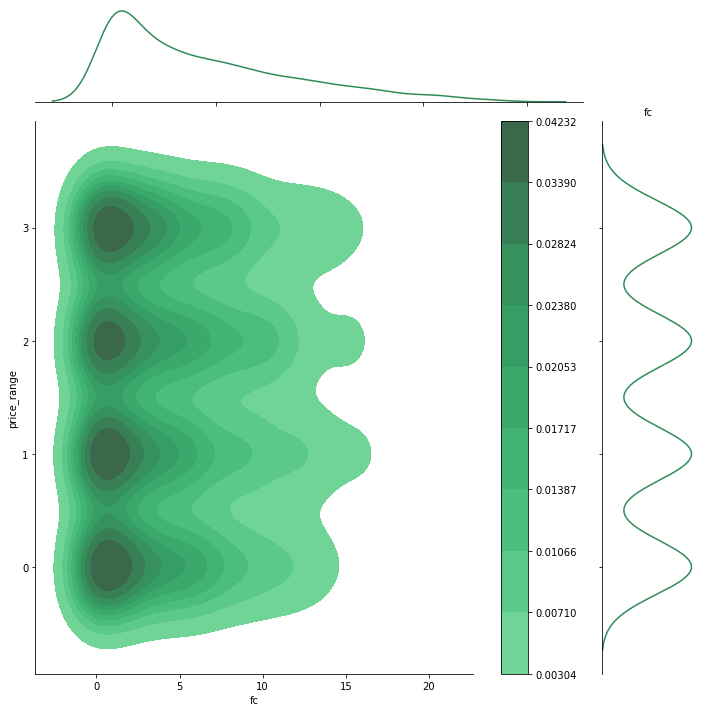

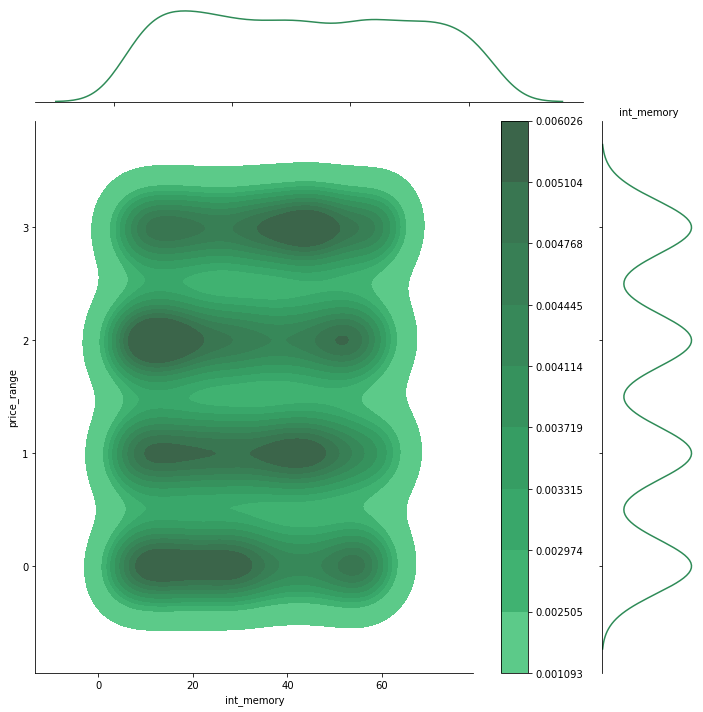

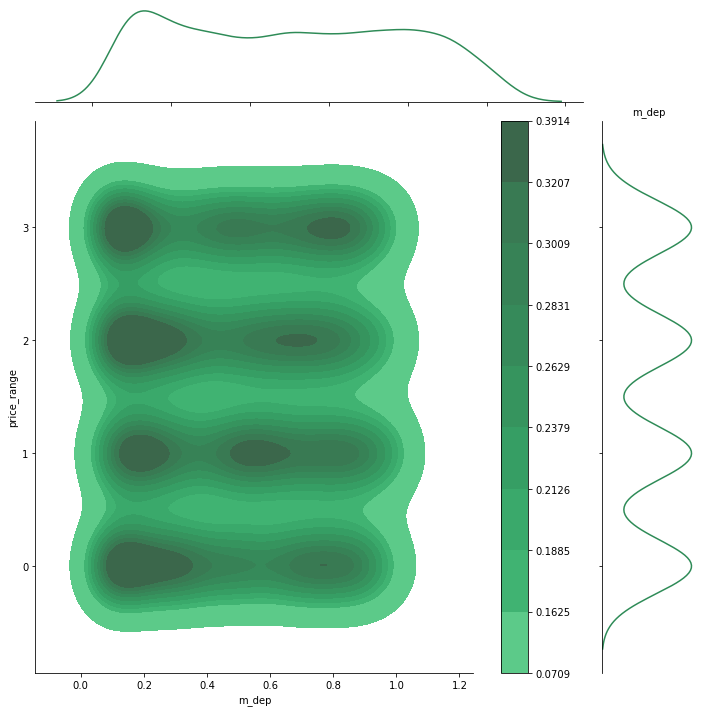

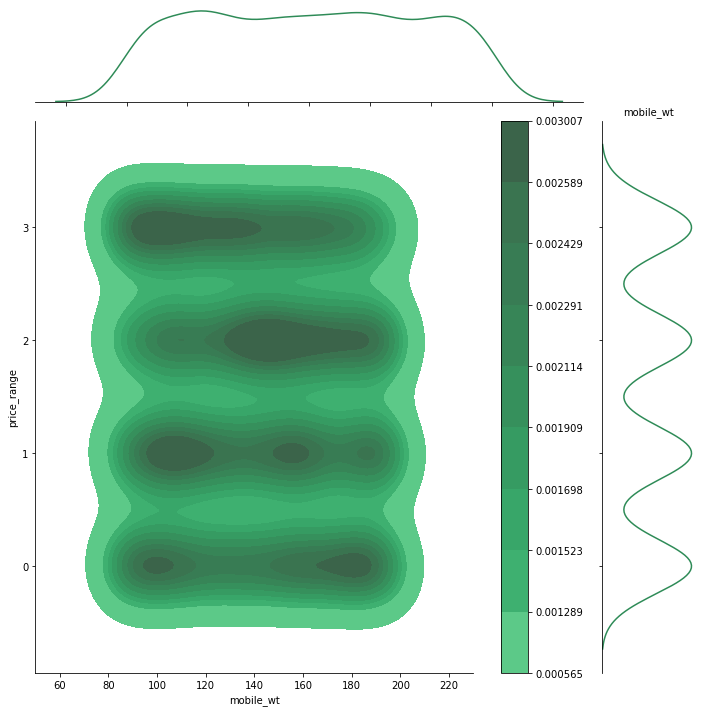

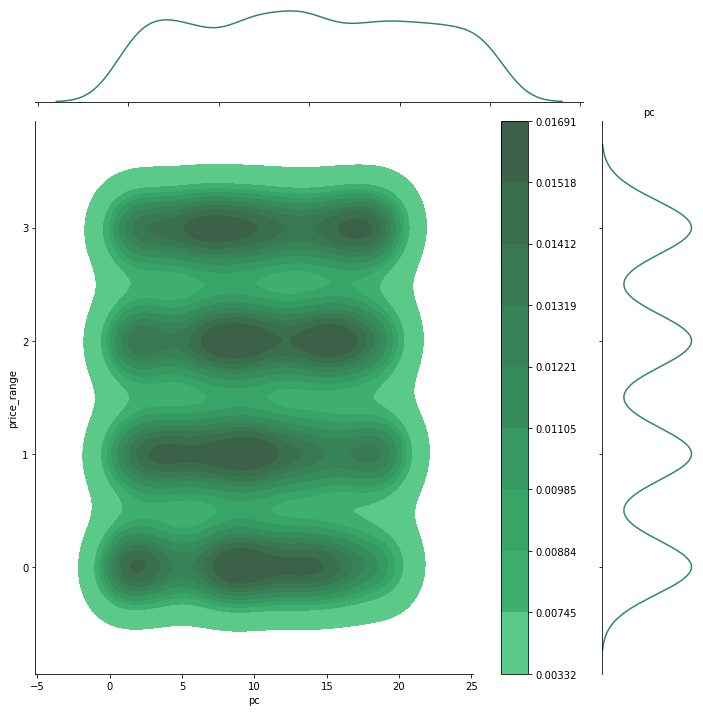

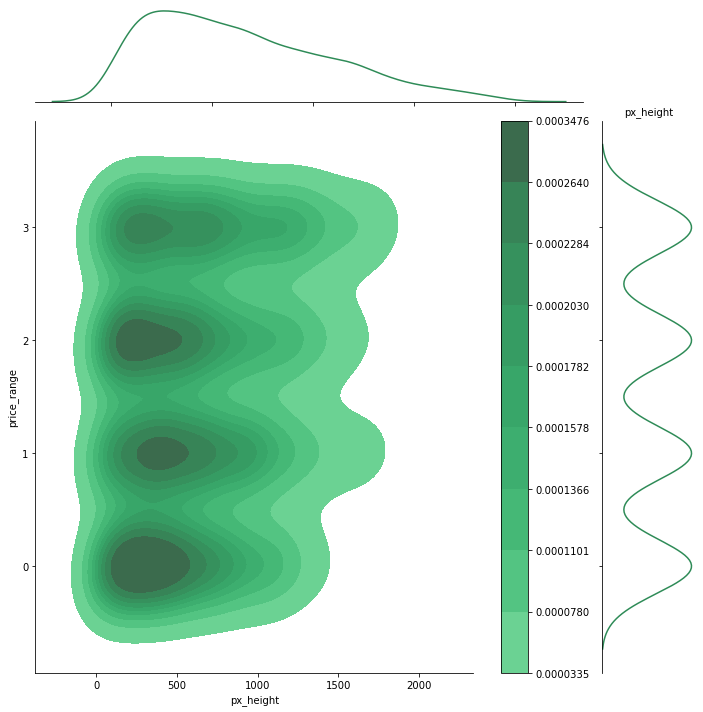

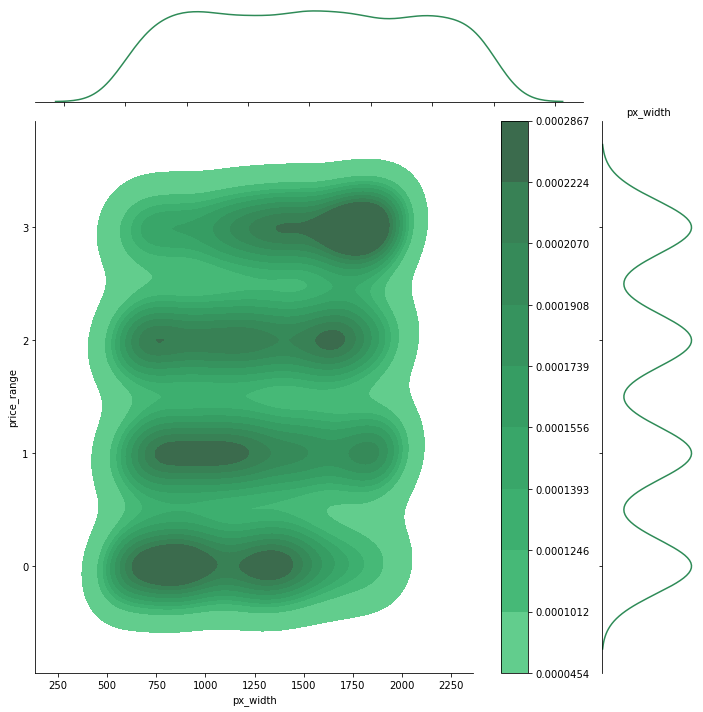

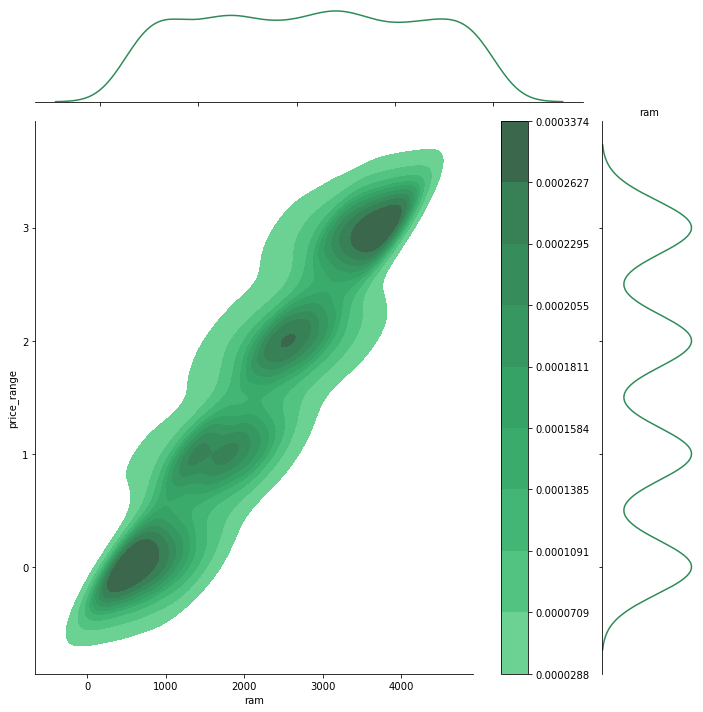

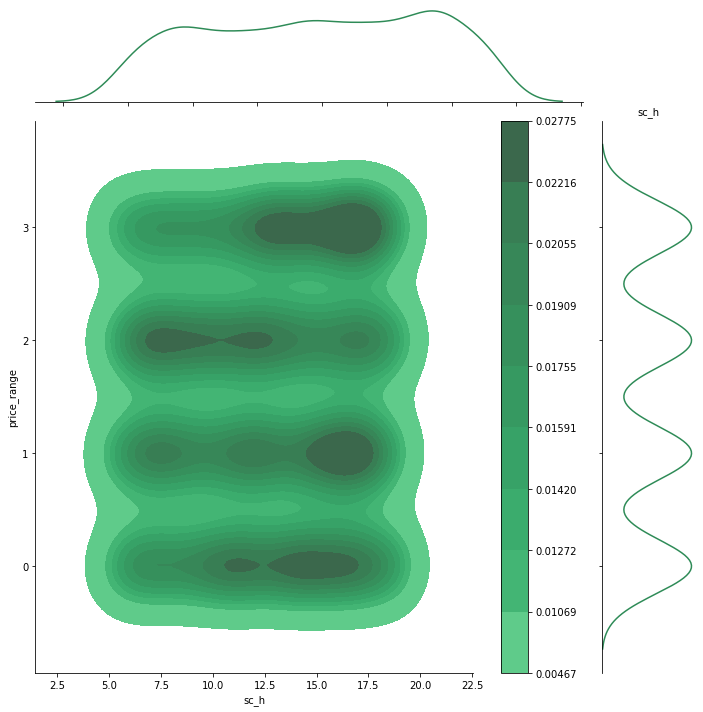

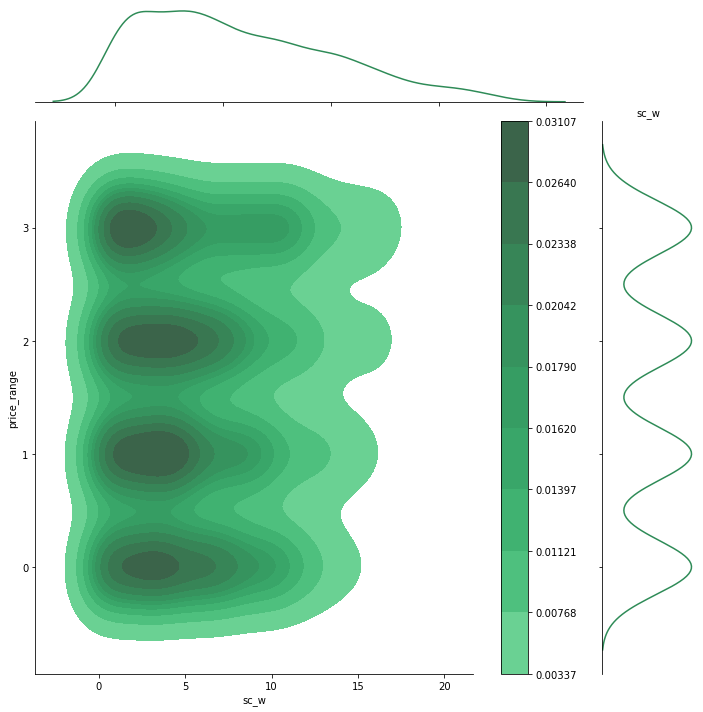

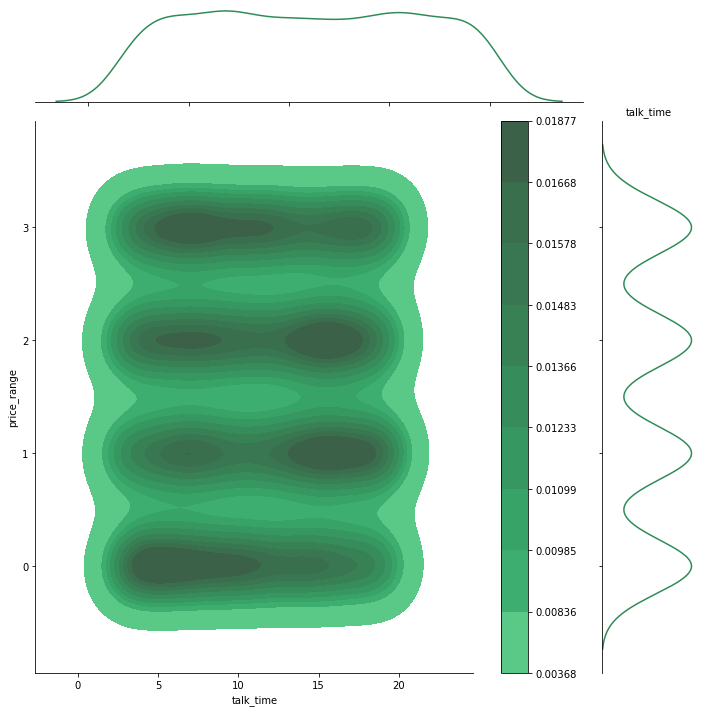

In [14]:
for i,c in enumerate(num_columns):    
    sns.jointplot(x=c, y='price_range', data=train, kind='kde', palette = "dict", color='seagreen', cbar=True, shade=True, height=10)
    plt.xlabel(c)
    plt.ylabel('price_range')
    plt.title(c,fontsize=10)

Análise:
* __battery_power__: A alta concentração de telefones na faixa da classe zero, abaixo de 1500 mAh é evidente, e quanto aos telefones mais caros, sua bateria está acima de 1500 mAh, como esperado.
* __clock_speed__: Existe uma concentração abaixo de 1,0 GHz para todos os grupos, porém, em todas as 4 categorias, há concentrações bipolares menores.
* __fc__: Concentração, em todos os grupos, abaixo de 5 mega
* __int_memory__: Para os celulares da classe 3, os mais caros, há muita concentração para valores acima de 35 GB. Os telefones mais baratos costumam ter valores mais baixos para memória interna.
* __m_dep__: Em todos os grupos, há presença de telefones mais finos. Porém, podemos dizer também que há concentrações mostrando que, quanto mais caro o celular, mais espesso.
* __mobile_wt__: Interessante: os telefones mais caros pesam menos, mas os telefones da classe 2 pesam mais.
* __pc__: Os telefones da classe 1 têm uma câmera principal com menos de 15 megapixels, mas os telefones da classe zero geralmente têm uma câmera principal maior. Para as classes mais caras, 2 e 3, as câmeras têm maior capacidade, como seria de se esperar...
* __px_height__: Em todos os grupos, há uma concentração de celulares com menos de 600 pixels.
* __px_width__: Em celulares caros, dos grupos 2 e 3, há uma concentração maior nos valores mais altos, ao contrário dos celulares mais baratos.
* __ram__: No caso da ram, é evidente que, quanto mais caro o celular, maior é a memória. 
* __sc_h__: A altura da maioria dos celulares das classes 0, 1 e 3 está situada acima de 11. Curiosamente, o grupo 2 é uma exceção.
* __sc_w__: Todos os grupos se concentram em uma pequena largura, porém, no grupo mais caro, a concentração é mais evidente.
* __talk_time__: Ao contrário do que poderia se esperar, no grupo 1, um dos mais baratos, a duração da bateria é maior.

__Observação__: em alguns casos (como o talk_time, mobile_wt e sc_h), os resultados parecem contra-intuitivos. Seria necessário, agora, uma análise mais profunda, caso a caso, para verificar, entre outras coisas, a qualidade dos dados, porém, isto está além do escopo deste trabalho.


### 2.3.2 - Correlação

Text(0.5, 1.0, 'Triangle')

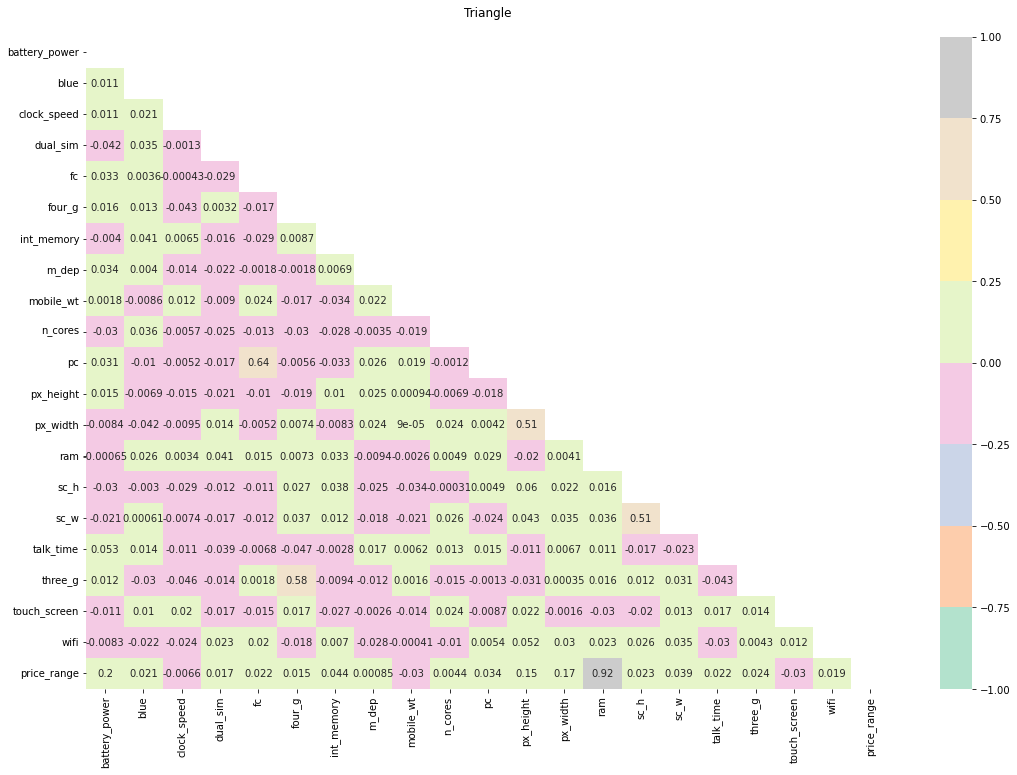

In [15]:
fig,ax=plt.subplots(1,1,figsize=(18,12))
mask=np.triu(np.ones_like(train.corr()))
heatmap=sns.heatmap(train.corr(),vmin=-1,vmax=1,mask=mask,cmap='Pastel2',annot=True)
heatmap.set_title('Triangle',fontdict={'fontsize':12},pad=20)



#### Pelo diagrama, podemos observar que:
* 1 - Existe uma correlação muito alta entre a RAM e o target. Provavelmente, este atributo terá um grande impacto na modelagem.
* 2 - Outros atributos que se destacam na correlação com o target, ainda que bem mais baixa do que a RAM: battery_power, px_height, px_width.
* 3 - Não parece haver alta correlação entre outros dois atributos quaisquer (desconsiderando o target), que justifique a remoção de alguma feature (a fim de evitar possíves problemas de multicolinearidade).

## Etapa 3 - Pré-processamento dos dados

### 3.1 - Valores ausentes e duplicados


In [16]:
# Verificando quantidade de valores ausentes nos dados de treino
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [17]:
# Verificando quantidade de valores ausentes nos dados de teste
test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

##### Conclusão: Não existem valores *NaN*s nos datasets


In [18]:
# Verificando quantidade de valores duplicados nos dados de treino
train.drop_duplicates(inplace=True)
train.shape

(2000, 21)

In [19]:
# Verificando quantidade de valores duplicados nos dados de teste
test.drop_duplicates(inplace=True)
test.shape

(1000, 21)

##### Conclusão: Também não existem valores duplicados

## Etapa 4 - Desenvolvimento do Modelo de Machine Learning

### 4.1 - Funções de apoio

In [20]:
# Função para apresentar as métricas gerais do modelo informado
def show_metrics (model, X_train, y_train, X_test, y_test, y_pred):
    ret = pd.Series({"Precision" : precision_score(y_test, y_pred,average='macro'),
                     "Recall" : recall_score(y_test, y_pred,average='macro'),
                     "F1" : f1_score(y_test, y_pred,average='macro'),
                     "Accuracy" : accuracy_score(y_test, y_pred),
                     "Train_Score" : model.score((X_train),y_train),
                    "Test_Score" : model.score((X_test), y_test)})

    
    print(ret)

In [21]:
# Fução para auxiliar a apresentação das principais features que impactam um modelo informado
def show_feature_importance(model, X):
    important_features = pd.Series(data=model.feature_importances_*100,index=X.columns)
    important_features.sort_values(ascending=False,inplace=True)
    print(important_features)

### 4.2 - Definição de Teste e Treino

In [22]:
#Determinando recordsets da treino do modelo
Y=train['price_range'] #Variável Target
X=train.drop('price_range',axis=1) #Variáveis de treino

#recordsets de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

### 4.3 - Baseline com Logistic Regression

Vamos criar um modelo baseado em Logistric Regression, um modelo mais simples para servir de "baseline" para compararmos com os resultados do modelo principal posteriormente.

In [23]:
lgr = LogisticRegression(random_state=42)
lgr.fit(X_train, y_train)
y_pred = lgr.predict(X_test)
show_metrics (lgr, X_train, y_train, X_test, y_test, y_pred)


Precision      0.635340
Recall         0.632771
F1             0.633741
Accuracy       0.635000
Train_Score    0.640000
Test_Score     0.635000
dtype: float64


### 4.4 - Modelo em Árvore

Nesse passo, vamos executar o modelo com algumas configurações básicas e analisar a possível ocorrência de overfitting.

In [24]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
show_metrics (dtc, X_train, y_train, X_test, y_test, y_pred)


Precision      0.822580
Recall         0.822186
F1             0.821950
Accuracy       0.823333
Train_Score    1.000000
Test_Score     0.823333
dtype: float64


Comparando-se com o baseline, o desempenho é superior.
<br>Porém, o desempenho do modelo no treino (Train_Score) está overfitado, comparando-se com o desempenho do teste (Test_Score) ( de 100% para 85,5% ).
<br>Sendo assim, vamos tentar encontrar parâmetros melhores utilizando o GridSearch.

### 4.5 - Modelo em Árvore - Tuning com GridSearch

In [25]:
dtct = DecisionTreeClassifier(random_state=42)

parameters={"criterion" : ['entropy'],
            "max_depth": [1,2,3, 4, 5, 6, 7, 8, 9, 10, None],
            "max_leaf_nodes": [1,2,3, 4, 5, 6, 7, 8, 9, 10]}
dtc_tuning=GridSearchCV(estimator=dtct, param_grid=parameters)
dtc_tuning.fit(X_train,y_train)


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [26]:
#melhores parâmetros
dtc_tuning.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 9}

Aplicando os melhores apresentados sugeridos, temos o resultado a seguir

In [27]:
dtc=DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=8, random_state=42)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
show_metrics (dtc, X_train, y_train, X_test, y_test, y_pred)


Precision      0.745477
Recall         0.749253
F1             0.743573
Accuracy       0.751667
Train_Score    0.784286
Test_Score     0.751667
dtype: float64


Apesar de a Acurácia ter caído, agora temos um modelo que não aparenta estar overfitado e o desempenho ainda é melhor que o baseline.

In [28]:
# Analisando a importância das features
show_feature_importance(dtc, X_train)

ram              89.454175
battery_power    10.545825
blue              0.000000
touch_screen      0.000000
three_g           0.000000
talk_time         0.000000
sc_w              0.000000
sc_h              0.000000
px_width          0.000000
px_height         0.000000
pc                0.000000
n_cores           0.000000
mobile_wt         0.000000
m_dep             0.000000
int_memory        0.000000
four_g            0.000000
fc                0.000000
dual_sim          0.000000
clock_speed       0.000000
wifi              0.000000
dtype: float64


Analisando-se a importância das features, vemos que na verdade, o modelo está utilizando apenas 3 atributos para execução:
- ram
- battery_power
- px_width

(interessante observar que esses 3 atributos estão justamente entre aqueles de maior correlação com a variável target, conforme analisado no item 2.3.2).

Sendo assim, vamos considerar uma simplificação, executando o modelo com um dataset com apenas esses 3 atributos.

### 4.6 - Modelo otimizado

In [29]:
#dataset com apenas as 3 princiapis features
X_principais_features = X[['ram', 'battery_power', 'px_width']].copy()
X_principais_features

,ram,battery_power,px_width
0,2549,842,756
1,2631,1021,1988
2,2603,563,1716
3,2769,615,1786
4,1411,1821,1212
...,...,...,...
1995,668,794,1890
1996,2032,1965,1965
1997,3057,1911,1632
1998,869,1512,670


In [30]:
# Refazendo os recordsets de treino e teste
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_principais_features, Y, test_size=0.3, random_state=42)

In [31]:
#Executando o modelo, com os mesmos parâmetros...
dtc_2=DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=8, random_state=42)
dtc_2.fit(X_train_2, y_train_2)
y_pred_2 = dtc_2.predict(X_test_2)
show_metrics (dtc_2, X_train_2, y_train_2, X_test_2, y_test_2, y_pred_2)


Precision      0.745477
Recall         0.749253
F1             0.743573
Accuracy       0.751667
Train_Score    0.784286
Test_Score     0.751667
dtype: float64


O modelo teve uma ligeira piora, o que mostra que os demais atributos ainda tem alguma importância, ainda que pequena.
<br>No entanto, para fins didáticos, vamos manter esse modelo simplificado para analisar outras caractísticas de forma mais simples.

## Etapa 5 - Análise Final


### 5.1 - Predição de Valores

              precision    recall  f1-score   support

           0       0.78      0.96      0.86       151
           1       0.72      0.61      0.66       146
           2       0.66      0.60      0.63       148
           3       0.82      0.83      0.82       155

    accuracy                           0.75       600
   macro avg       0.75      0.75      0.74       600
weighted avg       0.75      0.75      0.75       600



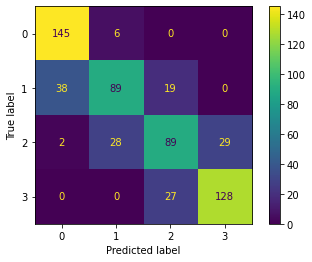

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

y_pred_2 = dtc_2.predict(X_test_2)

plot_confusion_matrix(dtc_2,X_test_2,y_test_2)
print(classification_report(y_test_2,y_pred_2))

### Nota-se que o modelo tem uma precisão maior em prever as classes 0 (low cost) e 3 (very high cost), do que as classes 1 (medium) e 2 (high).


In [33]:
# Agora, vamos fazer a previsão dos valores na base de teste original (equivalente aos dados não-vistos, como se fossem dados de produção)
test_principais_features = test[['ram', 'battery_power', 'px_width']].copy()
test_principais_features['price_range']=dtc_2.predict(test_principais_features)
test_principais_features

,ram,battery_power,px_width,price_range
0,3476,1043,1412,3
1,3895,841,857,3
2,2396,1807,1366,2
3,3893,1546,1752,3
4,1773,1434,810,1
...,...,...,...,...
995,2121,1700,913,1
996,1933,609,1632,1
997,1223,1185,825,1
998,2509,1533,832,2


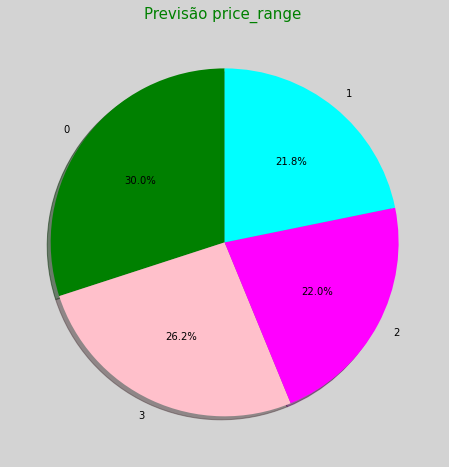

In [34]:
#Plotando 
labels = test_principais_features["price_range"].value_counts().index
sizes = test_principais_features["price_range"].value_counts()
colors = ['green','pink','magenta','cyan']
fig = plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=90)
plt.title('Previsão price_range ',color = 'green',fontsize = 15)
fig.set_facecolor('lightgrey')
plt.show()


Interessante observar que a distribuição final entre as classses está divergente de quando foi feita a mesma análise na base de treinamento (item 2.1).
<br>A classe 3 (very high cost) tem uma presença maior do que as demais. As classes 1 e 2 estão menores. 
<br>Analisando a matriz de confusão, as classes 0 e 3 (as de maior percentual na distribuição) são justamente as classes onde o modelo apresenta maior precisão. 
<br>Sendo assim, fica a pergunta: o modelo estaria enviesado ?

<br>Isso pode indicar que uma nova rodada de melhorias teria de ser feita no modelo, se possível.

### 5.2 - Visualização da Árvore

Visualizando a árvore graficamente

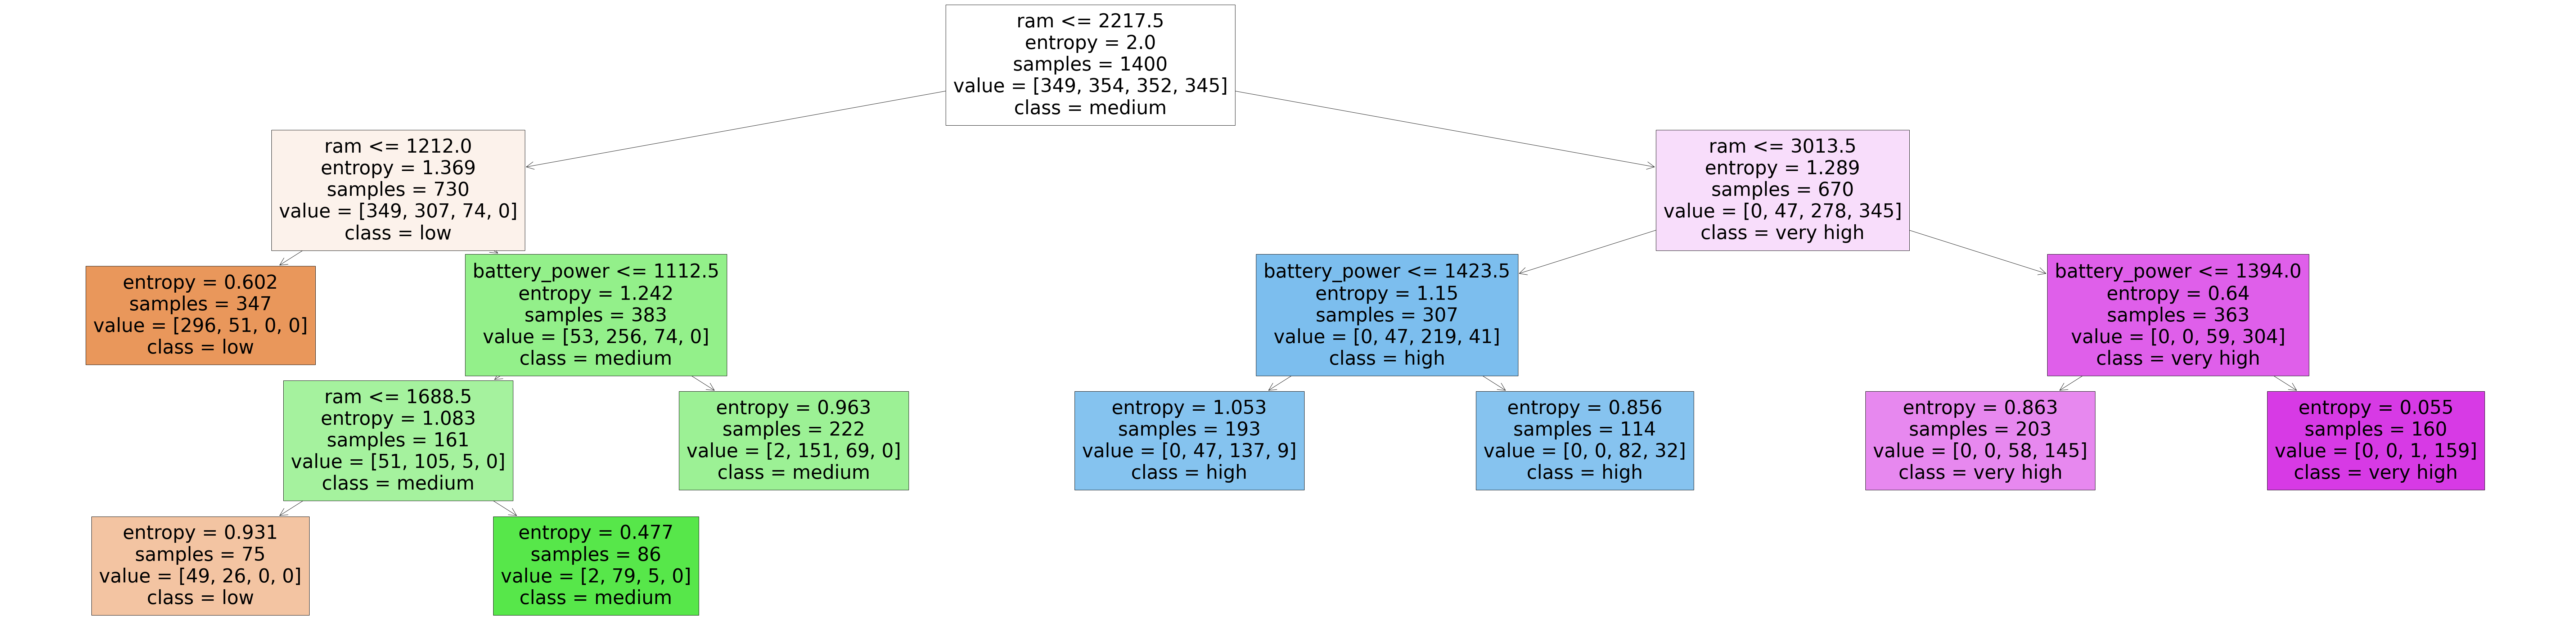

In [35]:
fig = plt.figure(figsize=(128,32))
_ = tree.plot_tree(dtc_2, 
                   feature_names=X_train_2.columns[:-1],  
                   class_names=['low','medium','high','very high'],                   
                   filled=True)

Devido à limitação do número de folhas (8) e da profundidade (4), árvore apresenta poucos caminhos de "decisão", o que facilita a compreensão, com destaque para o impacto dos atributos ram e battery_power.

### 5.3 - Análise das probabilidades

Simulando alguns exemplos para verificar as probabilidades, a partir de um array com os valores de ram, battery_power e px_width, respectivamente...

In [36]:
# 1 - Para 
print(dtc_2.predict_proba([[1300, 1000, 700]]).round(3))

#encontramos (com arredondamento), os valores [0.653, 0.347, 0., 0.], ou seja:
# - 65,3% para classe 0
# - 34,7% para classe 1
# -  0,0% para classe 2
# -  0,0% para classe 3

# Portanto, o valor selecionado seria o 0 (low)
# entropia calculada para este caso: 0,931

[[0.653 0.347 0.    0.   ]]


In [37]:
# 2 - Para 
print(dtc_2.predict_proba([[1700, 1000, 700]]).round(3))

#encontramos [0.023, 0.919, 0.058, 0.].
# Portanto, o valor selecionado seria o 1 (medium), com 91,9%
# entropia calculada para este caso: 0,477

[[0.023 0.919 0.058 0.   ]]


In [38]:
# 3 - Para 
print(dtc_2.predict_proba([[2500, 1500, 700]]).round(3))

#encontramos [0., 0., 0.719, 0.281].
# Portanto, o valor selecionado seria o 2 (high), com 71,9%
# entropia calculada para este caso: 0,856

[[0.    0.    0.719 0.281]]


In [39]:
# 4 - Para 
print(dtc_2.predict_proba([[4000, 1500, 700]]).round(3))

#encontramos [0., 0., 0.006, 0.994].
# Portanto, o valor selecionado seria o 3 (very high), com 99,4%
# entropia calculada para este caso: 0,055

[[0.    0.    0.006 0.994]]


In [40]:
# 5 - Para alguns valores ligeiramente diferentes do anterior
print(dtc_2.predict_proba([[4500, 1600, 756]]).round(3))

#encontramos [0., 0., 0.006, 0.994].
# Portanto, o valor selecionado seria o 3 (very high), com 99,4%
# entropia calculada para este caso: 0,055

[[0.    0.    0.006 0.994]]


Conclusões:
- a classe selecionada é aquela de maior percentual
- comparando-se os exemplos 4 e 5, observamos que, mesmo para valores diferentes de entrada, o percentual final calculado é o mesmo, desde que sejam da mesma "folha"
- quanto menor a entropia calculada, maior a probabilidade calculada pelo modelo (pois menor é a "incerteza")